In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path 
from keras.preprocessing import image
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
p=Path('images')
# print(type(p))
dirs=p.glob("*")  #regular expression using this object we can iterate over all files and get what we want 
label_dict={"cat":0,"dog":1,"horse":2,"human":3}
img_data=[]
labels=[]

for folder_names in dirs:
        #print(folder_names)
        label=str(folder_names).split("/")[-1][:-1]
         #print(label)
        
        
        
        for img_path in folder_names.glob("*.jpg"):
            img= image.load_img(img_path,target_size=(32,32))
            img_array=image.img_to_array(img)
            img_data.append(img_array)
            labels.append(label_dict[label])

In [3]:
print(len(img_data),len(labels))

808 808


In [4]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:
#convert this into numpy array
img_data=np.array(img_data,dtype='float32')/255.0
labels=np.array(labels)

print(img_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


### Randomly shuffle data

In [6]:
import random 

combined = list(zip(img_data,labels))
random.shuffle(combined)

#unzip
img_data[:],labels[:]=zip(*combined)

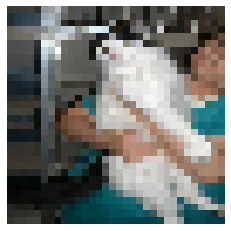

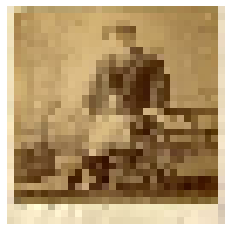

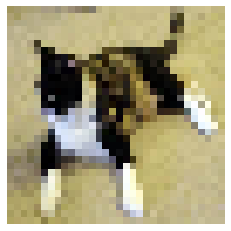

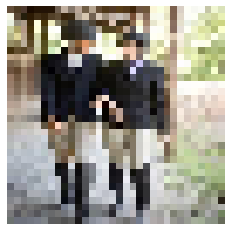

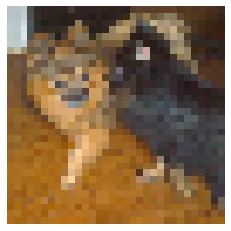

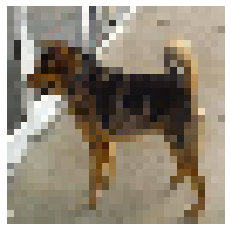

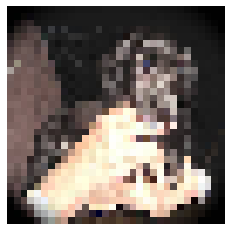

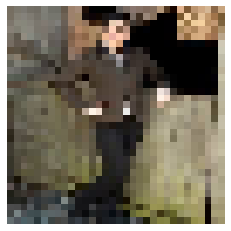

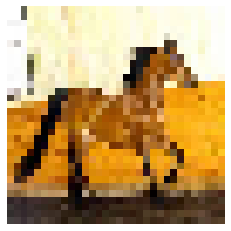

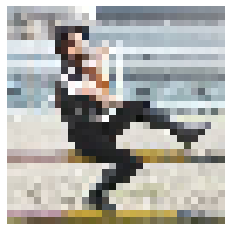

In [7]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
   
    return

for i in range(10):
    drawImg(img_data[i])

### SVM Classifier

In [8]:
class SVM:
  
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses    
  

### We need to convert data(group it) for ONE-VS-ONE Classification

In [9]:
#flatteing every image into a single row
img_data=img_data.reshape(img_data.shape[0],-1)


print(img_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [10]:
classes=len(np.unique(labels))
print(classes)

4


In [11]:
m=img_data.shape[0]
def class_wise_data(x,y):
    data={}
    
    for i in range(classes):
        data[i]=[]
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k]=np.array(data[k])
    return data
        
        

In [12]:
data=class_wise_data(img_data,labels)

In [13]:

print(data[0].shape)
print(data[0].shape[0])
print(data[1].shape[0])

(202, 3072)
202
202


In [14]:
def get_data_pair_forSVM(d1,d2):
    """Combines data of 2 classes into a single matrix"""
    
    l1,l2=d1.shape[0],d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    
    data_pair=np.zeros((samples,features))
    data_label=np.zeros((samples,))
    
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    
    data_label[:l1]= -1
    data_label[l1:]= +1
    
    return data_pair,data_label
    
    

### Training NC2 Classifier Using SVM

[404.0, 403.2466439609724, 402.49332804061675, 401.74005822002346, 400.9868386097194, 400.2336636556603, 399.48053168240574, 398.72744170833124, 397.9743996108481, 397.22140459768843, 396.4684539660687, 395.71554283074244, 394.96268170504516, 394.2098649423902, 393.4570911023676, 392.70436336112124, 391.9516831214712, 391.19904209833663, 390.4464565163203, 389.6939117042633, 388.94141245981444, 388.1889581709479, 387.43654832643784, 386.684188633324, 385.93186961343866, 385.17959406463234, 384.4273661846712, 383.6751858692647, 382.9230445992343, 382.1709508443442, 381.4189001816871, 380.66689535135447, 379.9149362962031, 379.1630247447761, 378.4111558115513, 377.6870778903697, 376.96304884938445, 376.212865838134, 375.5043786807981, 374.81012070233146, 374.1287057538825, 373.4203425819425, 372.71202145833786, 372.00374263205697, 371.3083084054645, 370.6143966215625, 369.9062456080677, 369.19813368092815, 368.51970221146416, 367.84229086855964, 367.13430324772924, 366.48572535971704, 36

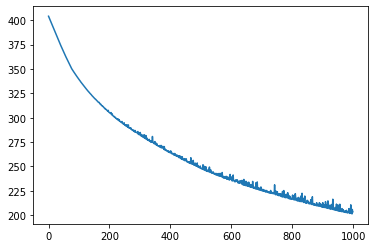

In [15]:
svm=SVM()
xp,yp=get_data_pair_forSVM(data[0],data[1])
w,b,loss=svm.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
print(loss)
plt.plot(loss)

In [16]:
def trainSVMs(x,y):
    svm_classifier={}
    for i in range(classes):
        svm_classifier[i]={}
        for j in range(i+1,classes):
            xpair,ypair=get_data_pair_forSVM(data[i],data[j])
            wts,b,loss=svm.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            plt.plot(loss)
            svm_classifier[i][j]=(wts,b)
            
    return svm_classifier
        

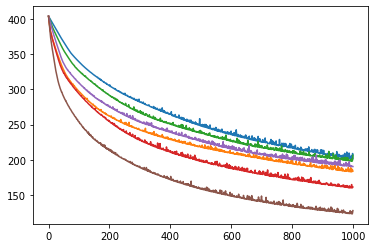

In [17]:
svm_classifiers=trainSVMs(img_data,labels)

In [18]:
cats_dogs=svm_classifiers[0][1]
print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
-0.015030000000000012


In [19]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1
    
    

In [20]:
def predict(x):
    
    count=np.zeros((classes,))
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b=svm_classifiers[i][j]
            #take a majority prediction
            z=binaryPredict(x,w,b)
            
            if (z==1):
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
    #print(final_prediction)
    return final_prediction

In [21]:
print(predict(img_data[0]))
print(labels[0])

0
0


In [22]:
def accuracy(x,y):
    
    count=0
    for i in range(x.shape[0]):
        pred=predict(x[i])
        if (pred==y[i]):
            count+=1
    return count/x.shape[0]

In [23]:
print(accuracy(img_data,labels))

0.5965346534653465


### SVM Using Sklearn 

In [24]:
from sklearn import svm

In [25]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [27]:
svm_classifier.fit(img_data,labels)
svm_classifier.score(img_data,labels)

0.6485148514851485